# Social Smart Meter

## Imports

In [1]:
import time

from datetime import datetime
from pymongo import MongoClient

from config import config
from data import collect_data, handle_data, store_data
from images import train_mcrnn_model, get_annotations

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Parameters

In [2]:
# Coordinates (Amsterdam)
latitude = "52.370216"
longitude = "4.895168"

# Radius in meters
distance = 1000

# Number of posts to retrieve
count = 10

# Start date
min_dt = datetime(2018, 4, 1, 0, 0, 0)
min_timestamp = time.mktime(min_dt.timetuple())

# End date
max_dt = datetime(2018, 4, 14, 0, 0, 0)
max_timestamp = time.mktime(max_dt.timetuple())

In [3]:
# Store parameters in object
params = {
    'lat': latitude,
    'lng': longitude,
    'distance': distance,  # radius of requested area
    'min_timestamp': str(min_timestamp),  # start date
    'max_timestamp': str(max_timestamp),  # end date
    'count': count,  # number of posts(100 max)
    'access_token': config['access_token']  # your access token
}

## Data collection

In [4]:
# Connect to the database
client = MongoClient('localhost', 27017)
db = client.thesis

In [5]:
# Get JSON response via Instagram API
response = collect_data(params)

In [6]:
# Store JSON response in database and return ObjectId
object_id = store_data(response, db)

## Data processing

### Train the model for text processing

In [7]:
# To be implemented..

# Directory to save trained model
# ner_model_dir = './models/ner/'

# Train NER model
# train_model(ner_model_dir)

### Train the model for image processing

In [8]:
# Directory to save logs and trained model
mcrnn_model_dir = './models/mcrnn/'

# Train Mask C-RNN model
mcrnn_model, mcrnn_dataset = train_mcrnn_model(mcrnn_model_dir)


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTANCES               100
MEAN_PIXEL                     [123.7 116.8 103.9]
MINI_MASK_SHAPE                (56, 56)
NAME                           coco
NUM_CLASSES                    81
POOL_SIZE                      7
POST_

### Process collected posts

['🏳️\u200d🌈💚']
Processing 1 images
image                    shape: (425, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


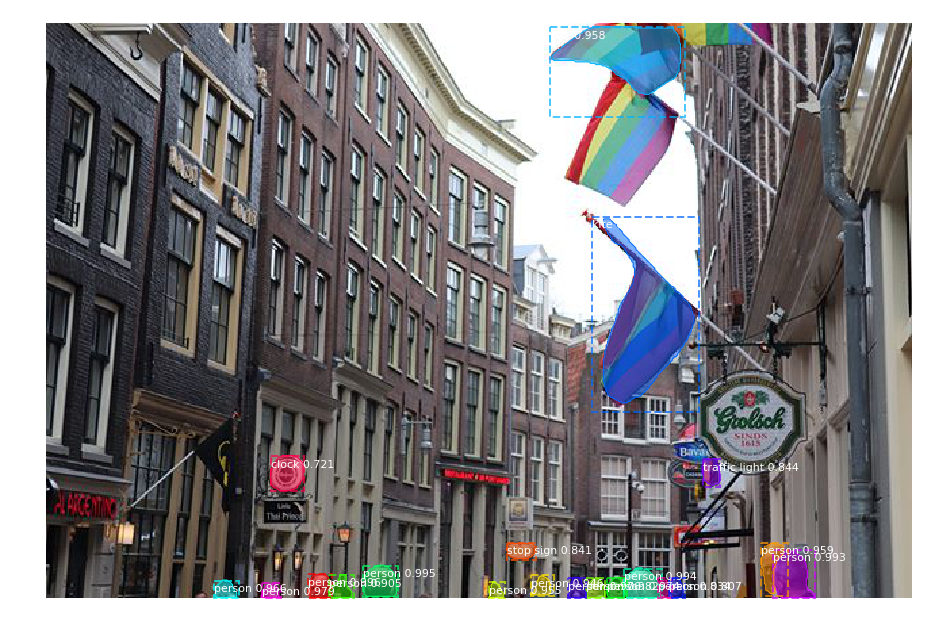

['Dacht', 'je', 'ons', 'gezien', 'te', 'hebben', 'op', 'TV', '?']
['Dat', 'kan', 'zeer', 'zeker', 'kloppen', '📺', 'rtllatenight', 'familiedag']
Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


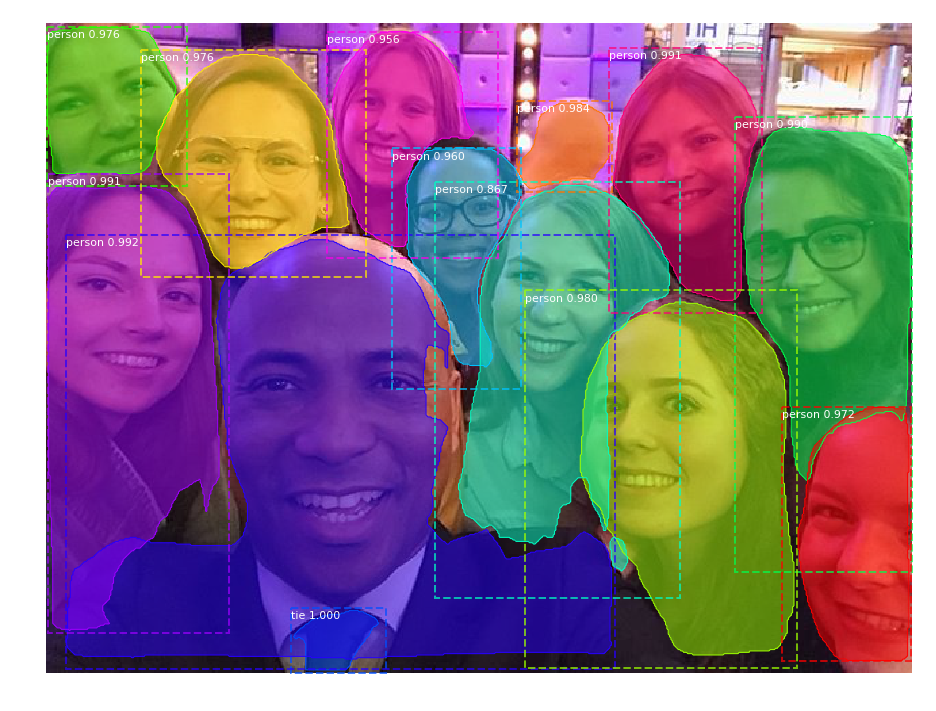

['flowers', 'amsterdam', 'colorful']
Processing 1 images
image                    shape: (640, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  149.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


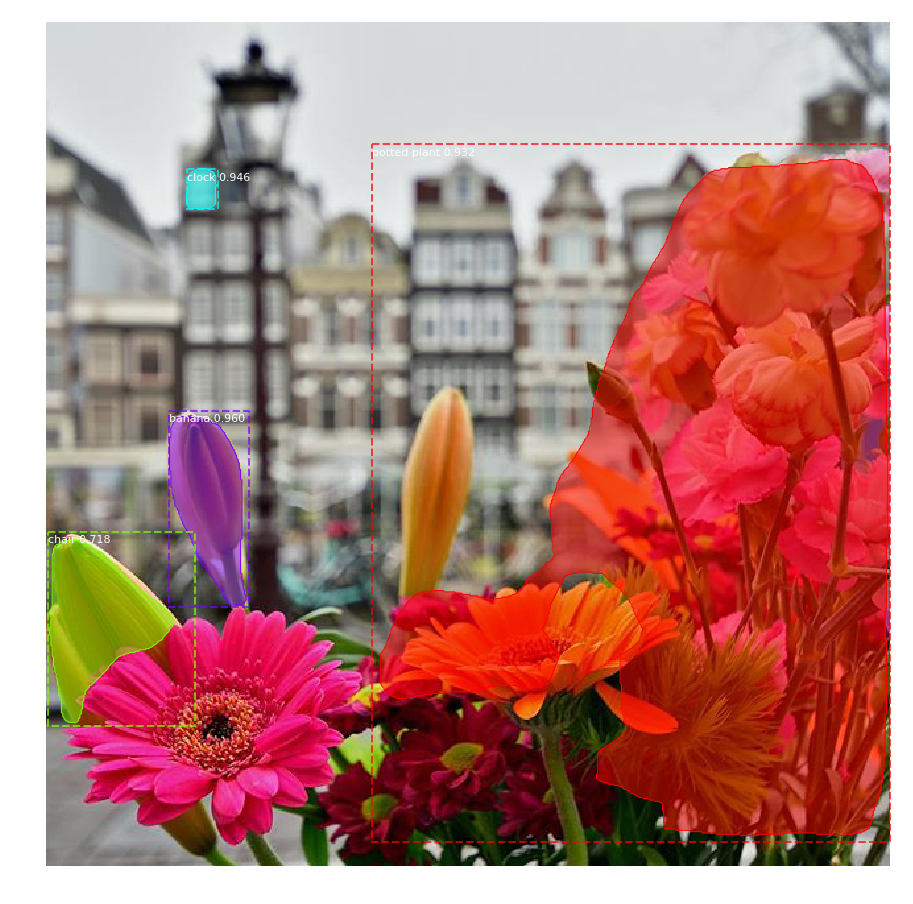

['Have', 'ever', 'visited', 'Amsterdam', '?', '🌷', 'amsterdam', 'visitamsterdam', 'amstergram', 'igersamsterdam', 'netherlands', 'holland', 'europe', 'spring', 'beautifuldestinations', 'theprettycities', 'happy']
Processing 1 images
image                    shape: (640, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  140.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


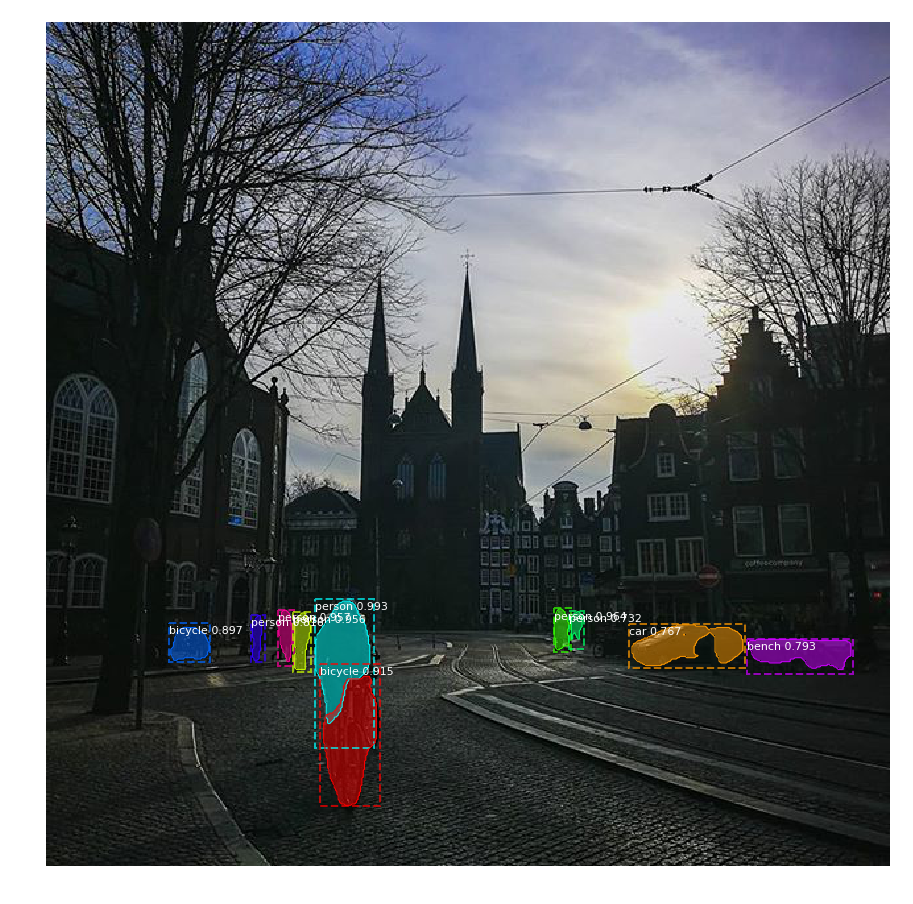

['Patrick', 'snapt', 'het', '!']
['Vanavond', 'Kanpai', 'effe', 'lekker', '✨✨', 'doemaarlekker', 'kanpai', 'proost', 'straatje']
Processing 1 images
image                    shape: (800, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


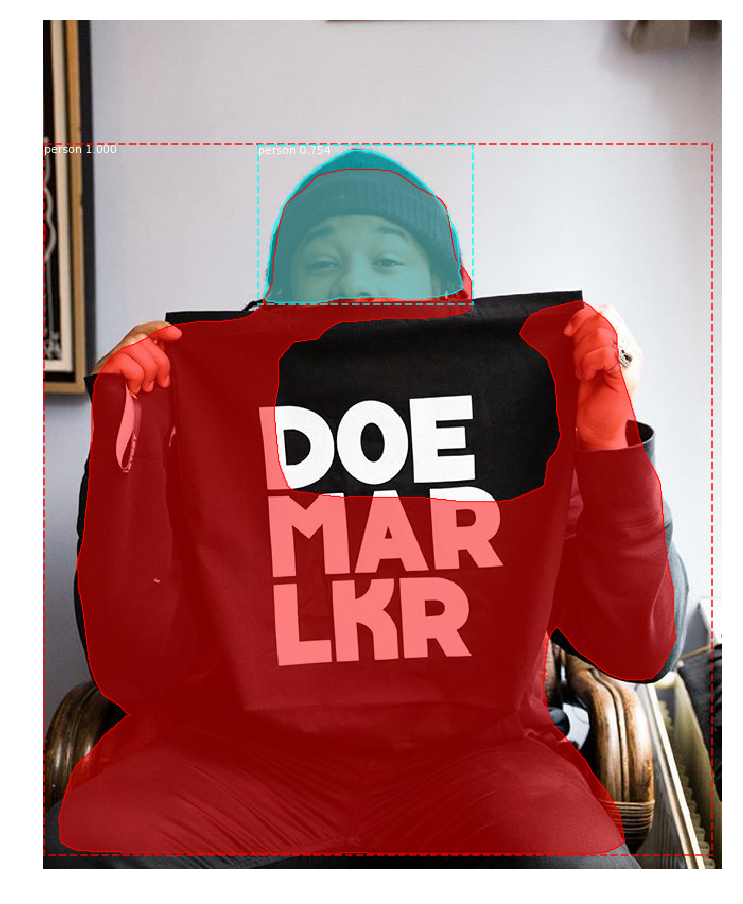

['@', 'clubnl', 'packed', 'already', '!', '!']
['🙌🏻']
Processing 1 images
image                    shape: (640, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


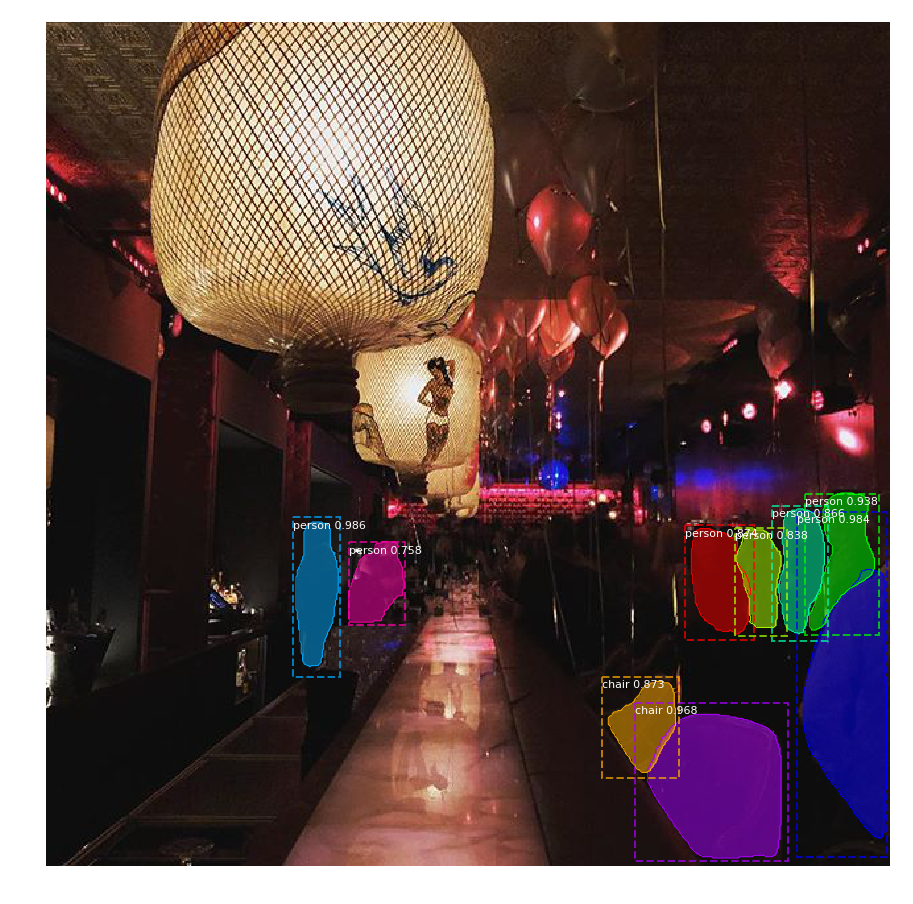

['delicious']
Processing 1 images
image                    shape: (800, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  139.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


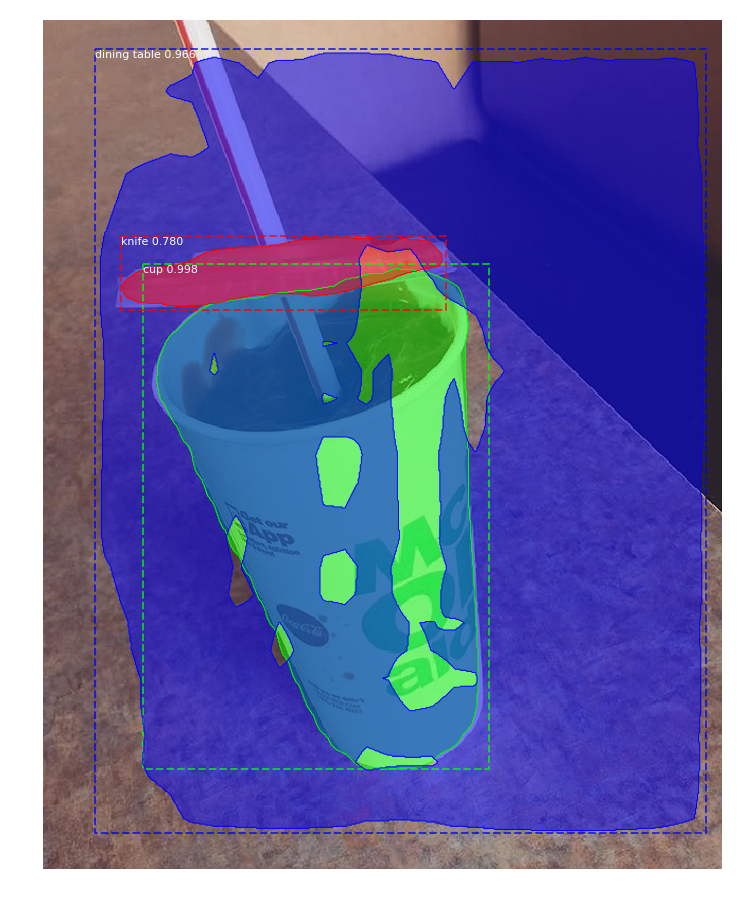

['-Haha', 'lekker', 'naar', 'mezelf', 'kijke', 'In', '@', 'amsterdammuseum', 'met', 'astronauten', 'pak', 'brb', 'xxx-']
Processing 1 images
image                    shape: (800, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


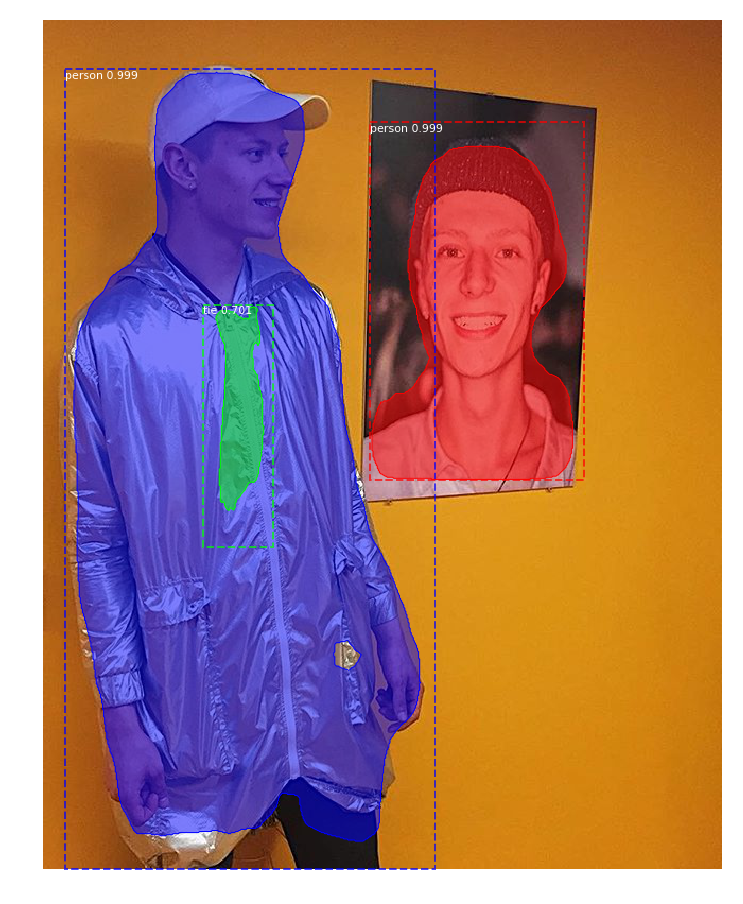

['amsterdam', 'netherlands', 'cafferemember', 'iwillremember']
Processing 1 images
image                    shape: (640, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


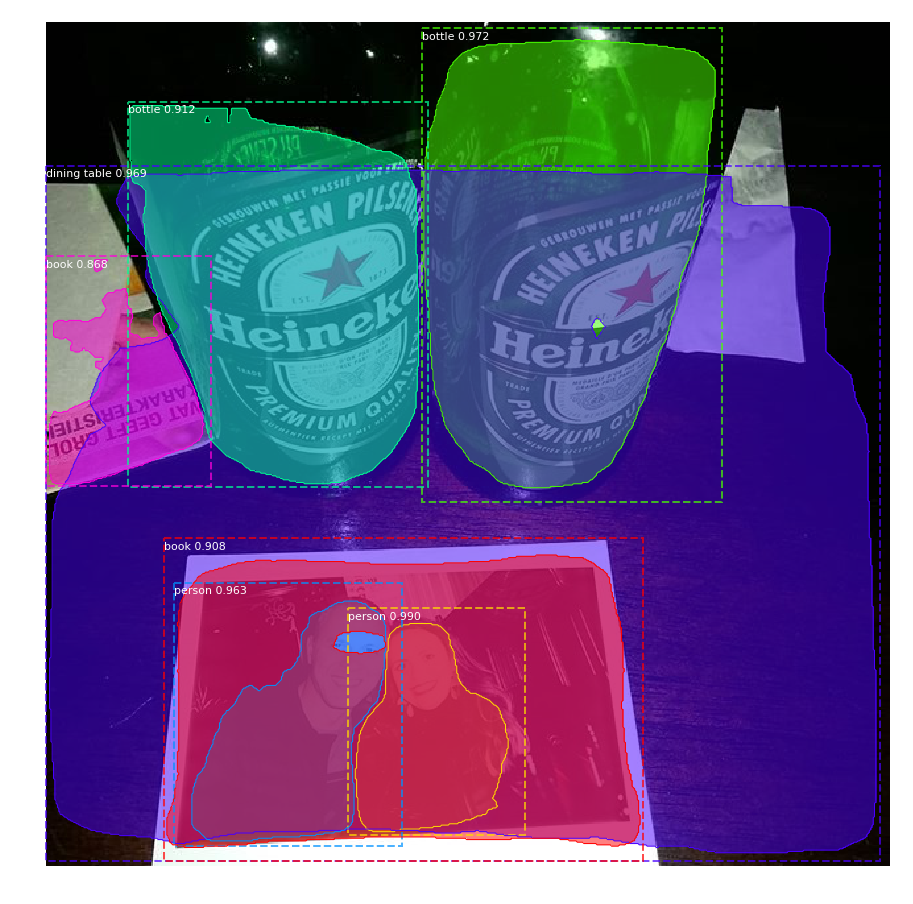

['redlightdistrict', 'amsterdam', 'netherlands🇳🇱']
Processing 1 images
image                    shape: (411, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


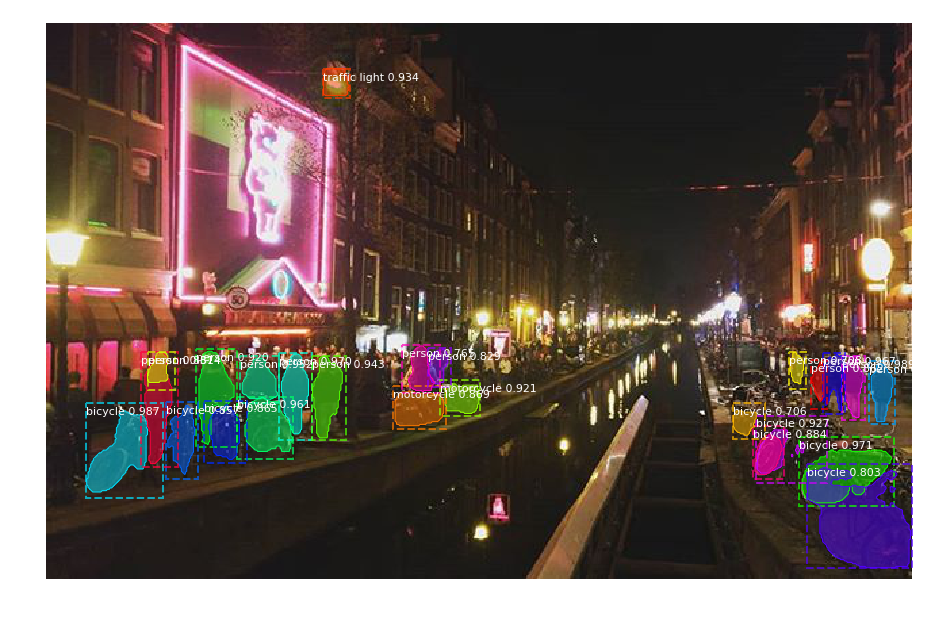

In [9]:
# Handle data from database collection
handle_data(db, object_id, mcrnn_model, mcrnn_dataset)

# To be further implemented..

## Rule-based approach

In [7]:
# To be implemented..

## Classification

In [9]:
# To be implemented..

## Visualization

In [10]:
# To be implemented..